# Kaggle's Titanic Problem

In [22]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
import wordcloud
from sklearn.preprocessing import LabelEncoder


In [23]:
trd = pd.read_csv('train.csv')
tsd = pd.read_csv('test.csv')
td = pd.concat([trd,tsd],ignore_index=True,sort=False)

In [24]:
pd.concat([trd,tsd], ignore_index=True, sort=False)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
1304,1305,NaN,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
1305,1306,NaN,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
1306,1307,NaN,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
1307,1308,NaN,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


Text(0.5, 1.0, 'Missing values heatmap')

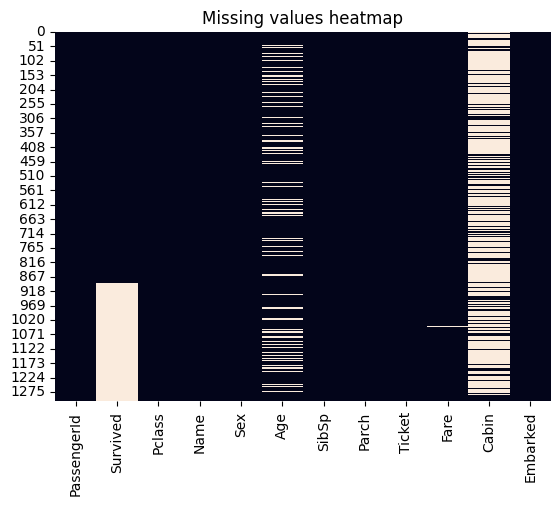

In [25]:
td.isnull().sum()
sns.heatmap(td.isnull(), cbar = False).set_title("Missing values heatmap")

In [26]:
td.nunique()

PassengerId    1309
Survived          2
Pclass            3
Name           1307
Sex               2
Age              98
SibSp             7
Parch             8
Ticket          929
Fare            281
Cabin           186
Embarked          3
dtype: int64

In [27]:
td['Family'] = td.Parch + td.SibSp

In [28]:
td['Is_Alone'] = td.Family ==0

In [29]:
td['Fare_Category'] = pd.cut(td['Fare'], bins=[0,7.90,14.45,31.28,120], labels = ['Low','Mid','High_Mid','High'])

In [30]:
td.Embarked.fillna(td.Embarked.mode()[0], inplace = True)

In [31]:
td.Cabin = td.Cabin.fillna('NA')

In [32]:
td['Salutation'] = td.Name.apply(lambda name: name.split(',')[1].split('.')[0].strip())

In [33]:
grp = td.groupby(['Sex','Pclass'])

In [34]:
grp.Age.apply(lambda x: x.fillna(x.median()))
td.Age.fillna(td.Age.median, inplace = True)

/tmp/ipykernel_6216/2360070992.py:1: FutureWarning: Not prepending group keys to the result index of transform-like apply. In the future, the group keys will be included in the index, regardless of whether the applied function returns a like-indexed object.
To preserve the previous behavior, use

	>>> .groupby(..., group_keys=False)

To adopt the future behavior and silence this warning, use 

	>>> .groupby(..., group_keys=True)
  grp.Age.apply(lambda x: x.fillna(x.median()))


In [35]:
td['Sex'] = LabelEncoder().fit_transform(td['Sex'])


In [36]:
pd.get_dummies(td.Embarked, prefix="Emb", drop_first=True)

,Emb_Q,Emb_S
0,0,1
1,0,0
2,0,1
3,0,1
4,0,1
...,...,...
1304,0,1
1305,0,0
1306,0,1
1307,0,1


In [37]:
td.drop(['Pclass', 'Fare', 'Cabin', 'Fare_Category', 'Name', 'Salutation', 'Deck', 'Ticket', 'Embarked', 'Age_Range', 'SibSp', 'Parch', 'Age'], axis=1, inplace=True)

KeyError: "['Deck', 'Age_Range'] not found in axis"